In [1]:
# project: p10
# submitter: wxia9
# partner: none
import os, math
import matplotlib
from math import radians, cos, sin, asin, sqrt
from bs4 import BeautifulSoup
import json
import pandas as pd
from pandas import DataFrame, Series
import requests

In [2]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return 0
    r = requests.get(url)
    r.raise_for_status()
    if not filename[-4:] == 'json':
        return r
    with open(filename, 'w') as f:
        json.dump(r.json(), f)
    return r.json()

In [3]:
receiver = download('countries.json', 'https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json')

In [4]:
countries = pd.read_json('countries.json')
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2381740,17.14,0.04,Africa,Algeria,4.61,6000,31.00,"70,0",-0.39,"78,1",32930091,NORTHERN AFRICA
170,103000,13.64,4.83,Europe,Iceland,6.72,30900,3.31,"99,9",2.38,"647,7",299388,WESTERN EUROPE
171,748,25.37,56.02,Australia,Tonga,5.28,2200,12.62,"98,5",0.00,"97,7",114689,OCEANIA
172,27750,36.44,6.38,North America,Haiti,12.17,1600,73.45,"52,9",-3.40,"16,9",8308504,LATIN AMER. & CARIB


In [5]:
#q1
countries.shape[0]

174

In [6]:
#q2
countries['area'].sum()

127170843

In [7]:
k = download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

In [8]:

page = BeautifulSoup(k.text, "html.parser")
tables = page.find_all("table")
trl = tables[0]
trs = trl.find_all("tr")
header = ['country', 'capital', 'latitude', 'longitude']
trs = trs[1:]
resultlist = list()
receivingdict = dict()
for tr in trs:
    receivingdict = dict()
    tds = tr.find_all('td')
    if countries['country'].str.contains(tds[0].get_text()).any():
        for i in range(4):
            receivingdict[header[i]] = tds[i].get_text()
        resultlist.append(receivingdict)
with open('capitals.json', 'w') as f:
    json.dump(resultlist, f)
capitals = pd.read_json('capitals.json')
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [9]:
#q3
receiver = capitals['country']
sorted(receiver.tolist())

['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [10]:
#q4
result = capitals['country'] == 'Cuba'
capitals[result]['capital'][capitals[result].index[0]]

'Havana'

In [11]:
#q5
result = capitals['capital'] == 'Tbilisi'
capitals[result]['country'][capitals[result].index[0]]

'Georgia'

In [12]:
#q6
southern = capitals.sort_values(by = ['latitude'])['country'].tolist()
southern[0:7]

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [13]:
#q7
receiver = southern[-5:]
receiver.reverse()
receiver

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [14]:
#q8
countries.describe()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,net-migration,population
count,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,7.308669e+05,22.463851,10.895000,9.625172,9829.885057,37.749425,0.124425,3.598794e+07
std,2.011115e+06,11.278992,38.347494,5.187143,10624.354342,35.242398,4.479222,1.337194e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,-13.920000,7.502000e+03
25%,2.777000e+04,12.597500,0.090000,6.027500,1900.000000,8.540000,-0.907500,2.027785e+06
50%,1.375200e+05,20.010000,0.450000,8.230000,5250.000000,23.920000,0.000000,7.454650e+06
75%,5.244775e+05,29.860000,3.165000,11.715000,14725.000000,61.732500,0.815000,2.287946e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,23.060000,1.313974e+09


In [15]:
#q9
countries = countries.replace(',', '.', regex = True)
countries['literacy'] = countries['literacy'].astype(float)
countries['phones'] = countries['phones'].astype(float)
countries.describe()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
count,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,7.308669e+05,22.463851,10.895000,9.625172,9829.885057,37.749425,82.362069,0.124425,215.770690,3.598794e+07
std,2.011115e+06,11.278992,38.347494,5.187143,10624.354342,35.242398,20.003166,4.479222,218.713811,1.337194e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,17.600000,-13.920000,1.300000,7.502000e+03
25%,2.777000e+04,12.597500,0.090000,6.027500,1900.000000,8.540000,70.100000,-0.907500,32.000000,2.027785e+06
50%,1.375200e+05,20.010000,0.450000,8.230000,5250.000000,23.920000,92.100000,0.000000,140.350000,7.454650e+06
75%,5.244775e+05,29.860000,3.165000,11.715000,14725.000000,61.732500,98.000000,0.815000,331.750000,2.287946e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,100.000000,23.060000,1035.600000,1.313974e+09


In [16]:
#q10
Europe = countries[(countries['coastline'] == 0)  & (countries['continent'] == 'Europe')]
Europe[Europe['area'] == Europe['area'].max()]['country'][Europe[Europe['area'] == Europe['area'].max()].index[0]]

'Belarus'

In [17]:
#q11
AsiaLand = countries[(countries['coastline'] == 0)  & (countries['continent'] == 'Asia')]
AsiaLand[AsiaLand['area'] == AsiaLand['area'].max()]['country'][AsiaLand[AsiaLand['area'] == AsiaLand['area'].max()].index[0]]

'Kazakhstan'

In [18]:
#q12
AsiaLand[AsiaLand['population'] == AsiaLand['population'].max()]['country'][AsiaLand[AsiaLand['population'] == AsiaLand['population'].max()].index[0]]

'Afghanistan'

In [19]:
#copied from: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [20]:
#q13
haversine(-89.411893, 43.070231,-89.384113, 43.074645)

1.433899492072933

In [21]:
#q14
lon1 = capitals['longitude'][capitals[capitals['country'] == 'Japan'].index[0]]
lat1 = capitals['latitude'][capitals[capitals['country'] == 'Japan'].index[0]]
lon2 = capitals['longitude'][capitals[capitals['country'] == 'France'].index[0]]
lat2 = capitals['latitude'][capitals[capitals['country'] == 'France'].index[0]]
haversine(lon1,lat1,lon2,lat2)

6032.330932363535

In [22]:
#q15
Guamlon = capitals['longitude'][capitals[capitals['country'] == 'Guam'].index[0]]
Guamlat = capitals['latitude'][capitals[capitals['country'] == 'Guam'].index[0]]
Newlon = capitals['longitude'][capitals[capitals['country'] == 'New Zealand'].index[0]]
Newlat = capitals['latitude'][capitals[capitals['country'] == 'New Zealand'].index[0]]
Auslon = capitals['longitude'][capitals[capitals['country'] == 'Australia'].index[0]]
Auslat = capitals['latitude'][capitals[capitals['country'] == 'Australia'].index[0]]
df =  DataFrame({
    "Guam": ["NaN", haversine(Guamlon,Guamlat,Newlon,Newlat), haversine(Guamlon,Guamlat,Auslon,Auslat)],
    "New Zealand": [haversine(Guamlon,Guamlat,Newlon,Newlat),"NaN",haversine(Auslon,Auslat,Newlon,Newlat)],
    "Australia": [haversine(Guamlon,Guamlat,Auslon,Auslat),haversine(Auslon,Auslat,Newlon,Newlat),"NaN"]
}, index=["Guam", "New Zealand", "Australia"])
df

,Guam,New Zealand,Australia
Guam,NaN,4239.31,3377.1
New Zealand,4239.31,NaN,1445.15
Australia,3377.1,1445.15,NaN


In [23]:
#q16
Auscountry = countries[countries['continent'] == 'Australia']['country'].tolist()
AusDict = dict()
temp = list()
lon1 = 0
lat1 = 0
lon2 = 0
lat2 = 0
for i in range(len(Auscountry)):
    lon1 = 0
    lat1 = 0
    lon2 = 0
    lat2 = 0
    temp = list()
    lon1 = capitals['longitude'][capitals[capitals['country'] == Auscountry[i]].index[0]]
    lat1 = capitals['latitude'][capitals[capitals['country'] == Auscountry[i]].index[0]]
    for j in range(len(Auscountry)):
        lon2 = capitals['longitude'][capitals[capitals['country'] == Auscountry[j]].index[0]]
        lat2 = capitals['latitude'][capitals[capitals['country'] == Auscountry[j]].index[0]]
        if Auscountry[i] == Auscountry[j]:
            temp.append(None)
        else:
            temp.append(haversine(lon1,lat1,lon2,lat2))
    AusDict[Auscountry[i]] = temp

AusDistance = DataFrame(AusDict
    , Auscountry)
AusDistance

,Marshall Islands,French Polynesia,New Zealand,Vanuatu,Palau,Papua New Guinea,Guam,Samoa,New Caledonia,Australia,Fiji,Tonga
Marshall Islands,NaN,3159.856137,3348.725378,1727.328621,2516.301728,2019.144119,1861.584428,1849.150692,2054.905160,3263.901948,1806.972599,2151.129410
French Polynesia,3159.856137,NaN,2668.807328,2765.339382,5447.018761,4265.757856,4961.131713,1496.953816,2864.497308,3920.570216,2102.135722,1686.539411
New Zealand,3348.725378,2668.807328,NaN,1671.641167,4218.188412,2767.607095,4239.314912,2062.548020,1400.483623,1445.147895,1613.916992,1510.219450
Vanuatu,1727.328621,2765.339382,1671.641167,NaN,2882.041892,1527.495923,2687.395771,1349.904435,335.602971,1687.810709,663.967196,1098.016273
Palau,2516.301728,5447.018761,4218.188412,2882.041892,NaN,1453.306058,800.243081,3956.305436,2974.892838,3099.023227,3468.037102,3931.843110
Papua New Guinea,2019.144119,4265.757856,2767.607095,1527.495923,1453.306058,NaN,1591.171595,2789.123270,1552.708901,1786.749660,2174.712829,2623.742354
Guam,1861.584428,4961.131713,4239.314912,2687.395771,800.243081,1591.171595,NaN,3520.883355,2871.868601,3377.103870,3165.570014,3617.512808
Samoa,1849.150692,1496.953816,2062.548020,1349.904435,3956.305436,2789.123270,3520.883355,NaN,1542.152644,2840.091065,716.316054,553.393188
New Caledonia,2054.905160,2864.497308,1400.483623,335.602971,2974.892838,1552.708901,2871.868601,1542.152644,NaN,1375.924712,825.890876,1179.069567
Australia,3263.901948,3920.570216,1445.147895,1687.810709,3099.023227,1786.749660,3377.103870,2840.091065,1375.924712,NaN,2145.768971,2362.766922


In [24]:
#q17
mindict = dict()
for i in range(len(Auscountry)):
    average = AusDistance[Auscountry[i]].mean(axis = 0, skipna = True)
    mindict[Auscountry[i]] = average
minkey = None
for key in mindict:
    if minkey == None:
        minkey = key
    if mindict[minkey] > mindict[key]:
        minkey = key
minkey

'Vanuatu'

In [25]:
#q18
maxkey = None
for key in mindict:
    if maxkey == None:
        maxkey = key
    if mindict[maxkey] < mindict[key]:
        maxkey = key
maxkey

'French Polynesia'

In [26]:
#q19
shortest = AusDistance.min(axis = 0, skipna = True).tolist()
nearestcountry = AusDistance.idxmin(axis = 0, skipna = True).tolist()
shortestdf = DataFrame({
    "nearest": nearestcountry,
    "distance": shortest
}, Auscountry)
shortestdf

,nearest,distance
Marshall Islands,Vanuatu,1727.328621
French Polynesia,Samoa,1496.953816
New Zealand,New Caledonia,1400.483623
Vanuatu,New Caledonia,335.602971
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Guam,Palau,800.243081
Samoa,Tonga,553.393188
New Caledonia,Vanuatu,335.602971
Australia,New Caledonia,1375.924712


In [27]:
#q20
furtherestcountry = AusDistance.idxmax(axis = 0, skipna = True).tolist()
distance = AusDistance.max(axis = 0, skipna = True).tolist()
longestdf = DataFrame({
    "furthest": furtherestcountry,
    "distance": distance
}, Auscountry)
longestdf

,furthest,distance
Marshall Islands,New Zealand,3348.725378
French Polynesia,Palau,5447.018761
New Zealand,Guam,4239.314912
Vanuatu,Palau,2882.041892
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Guam,French Polynesia,4961.131713
Samoa,Palau,3956.305436
New Caledonia,Palau,2974.892838
Australia,French Polynesia,3920.570216


In [28]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [29]:
#q21
sql = """SELECT continent, COUNT(*) AS "number of countries"
FROM countries
GROUP BY continent
ORDER BY "number of countries", "continent"
"""
df = pd.read_sql(sql, conn)
df

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


Text(0.5, 0, 'continent')

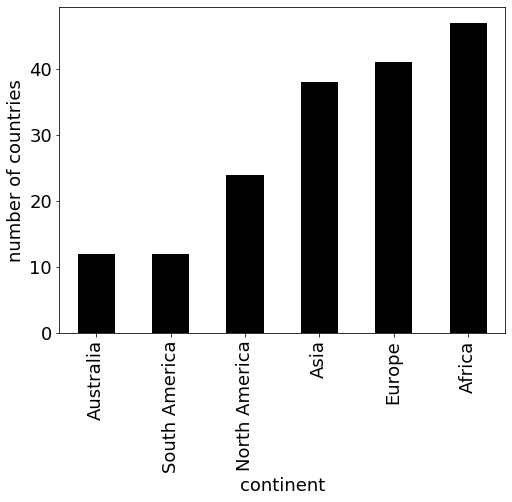

In [30]:
#q22
df.index = df['continent'].tolist()
%matplotlib inline
ax = df.plot.bar(figsize = (8, 6), color = '0', fontsize = 18, legend=False)
ax.set_ylabel("number of countries", fontsize = 18)
ax.set_xlabel("continent", fontsize = 18)

In [31]:
#q23
sql = """SELECT continent, SUM(population) AS "total population (million)"
FROM countries
GROUP BY continent
ORDER BY "total population (million)" DESC, "continent" 
"""
popdf = pd.read_sql(sql, conn)
popdf['total population (million)'] = popdf['total population (million)']/1000000
popdf

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0.5, 0, 'continent')

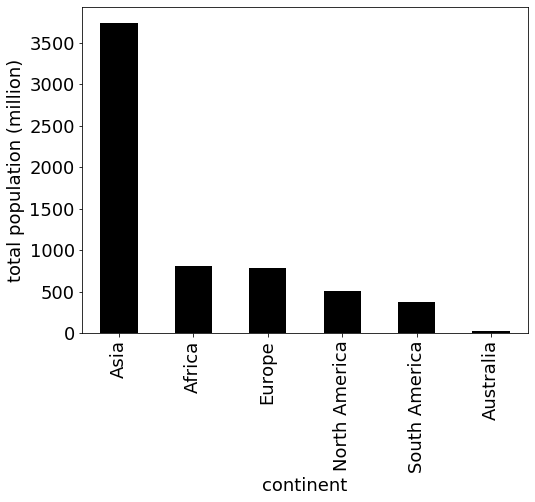

In [32]:
#q24
popdf.index = popdf['continent']
ax = popdf.plot.bar(figsize = (8, 6), color = '0', fontsize = 18, legend=False)
ax.set_ylabel('total population (million)', fontsize = 18)
ax.set_xlabel("continent", fontsize = 18)

In [33]:
#q25
sql = """SELECT country, SUM(population) AS "population"
FROM countries
WHERE continent == 'South America'
GROUP BY country
ORDER BY "population" DESC, "country" 
"""
southpopdf = pd.read_sql(sql, conn)
southpopdf

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [34]:
#q26
sql = """SELECT country, population * `gdp-per-capita` AS 'real GDP (billion)'
FROM countries
GROUP BY country
ORDER BY "real GDP (billion)" DESC, "country"
"""
gdpdf = pd.read_sql(sql, conn)
gdpdf["real GDP (billion)"] = gdpdf["real GDP (billion)"]/1000000000
gdpdf.iloc[0:10]

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


Text(0.5, 0, 'country')

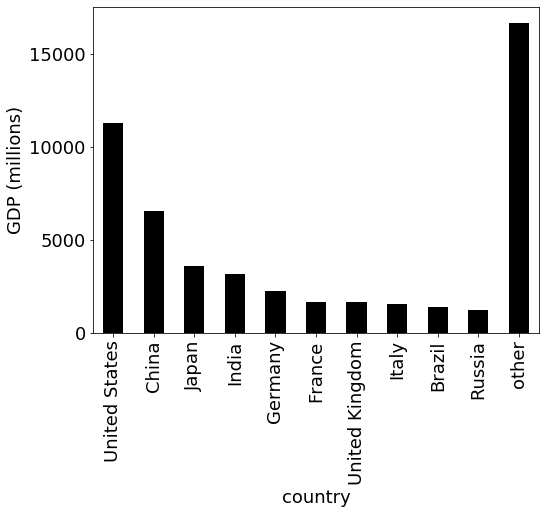

In [35]:
#q27
gdpdf2 = gdpdf.set_index('country')
slicer = gdpdf2['real GDP (billion)'].iloc[:10]
slicer['other'] = gdpdf["real GDP (billion)"].iloc[10:].sum()
ax = slicer.plot.bar(figsize = (8, 6), color = '0', fontsize = 18)
ax.set_yticks([0, 5000, 10000, 15000])
ax.set_ylabel('GDP (millions)', fontsize = 18)
ax.set_xlabel("country", fontsize = 18)

In [36]:
#q28
sql = """SELECT country, `birth-rate`, `death-rate`
FROM countries
GROUP BY country
ORDER BY `birth-rate`- `death-rate` DESC, "country"
"""
ratedf = pd.read_sql(sql, conn)
ratedf[0:15]

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5, 0, 'rate')

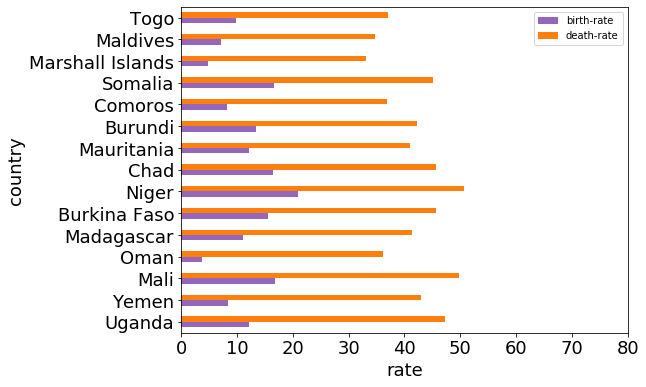

In [37]:
#q29
ratedf.index = ratedf['country'].tolist()
receiver = ratedf['death-rate'].copy()
ratedf['death-rate'] = ratedf['birth-rate'].copy()
ratedf['birth-rate'] = receiver
ax = ratedf[:15].plot.barh(figsize = (8, 6), color = ['tab:purple', 'tab:orange'], fontsize = 18)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_ylabel('country', fontsize = 18)
ax.set_xlabel("rate", fontsize = 18)

Text(0.5, 0, 'death-rate')

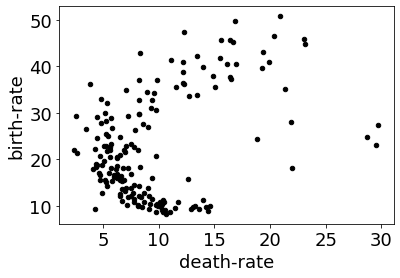

In [38]:
#q30
receiver = ratedf['death-rate'].copy()
ratedf['death-rate'] = ratedf['birth-rate'].copy()
ratedf['birth-rate'] = receiver
ax = ratedf.plot.scatter(x = 'death-rate', y = 'birth-rate', c = 'black', fontsize = 18)
ax.set_ylabel('birth-rate', fontsize = 18)
ax.set_xlabel('death-rate', fontsize = 18)

In [39]:
#q31
sql = """SELECT country, `death-rate`, `birth-rate`
FROM countries
WHERE `birth-rate` < 30 AND `death-rate` > 17
GROUP BY country
ORDER BY `death-rate` , "country"
"""
sixdf = pd.read_sql(sql, conn)
sixdf

,country,death-rate,birth-rate
0,Namibia,18.86,24.32
1,Zimbabwe,21.84,28.01
2,South Africa,22.00,18.20
3,Lesotho,28.71,24.75
4,Botswana,29.50,23.08
5,Swaziland,29.74,27.41


In [40]:
#q32
ratedf.corr()['death-rate'].loc['birth-rate']

0.39650861177525115

Text(0.5, 0, 'gdp-per-capita')

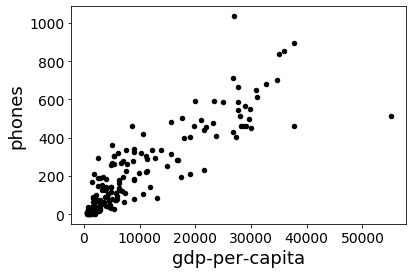

In [41]:
#q33
sql = """SELECT `gdp-per-capita`, `phones`
FROM countries
"""
phonesgdpdf = pd.read_sql(sql, conn)
ax = phonesgdpdf.plot.scatter(x = 'gdp-per-capita', y = 'phones', c = 'black', fontsize = 14)
ax.set_ylabel('phones', fontsize = 18)
ax.set_xlabel('gdp-per-capita', fontsize = 18)

In [42]:
#q34
phonesgdpdf.corr()['phones'].loc['gdp-per-capita']

0.8786946640591311

Text(0.5, 0, 'literacy')

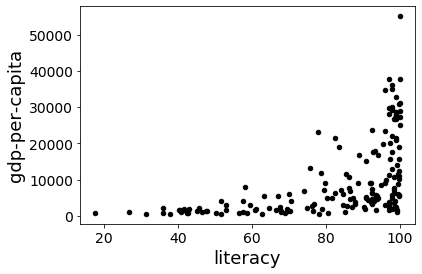

In [43]:
#q35
sql = """SELECT `gdp-per-capita`, `literacy`
FROM countries
"""
phonesgdpdf = pd.read_sql(sql, conn)
ax = phonesgdpdf.plot.scatter(x = 'literacy', y = 'gdp-per-capita', c = 'black', fontsize = 14)
ax.set_ylabel('gdp-per-capita', fontsize = 18)
ax.set_xlabel('literacy', fontsize = 18)

Text(0.5, 0, 'gdp-per-capita')

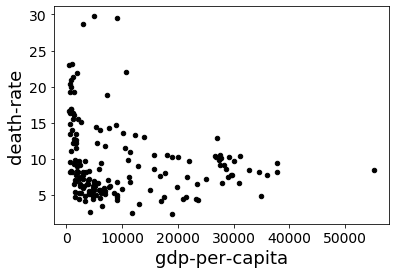

In [44]:
#q36
sql = """SELECT `gdp-per-capita`, `death-rate`
FROM countries
"""
phonesgdpdf = pd.read_sql(sql, conn)
ax = phonesgdpdf.plot.scatter(x = 'gdp-per-capita', y = 'death-rate', c = 'black', fontsize = 14)
ax.set_ylabel('death-rate', fontsize = 18)
ax.set_xlabel('gdp-per-capita', fontsize = 18)

Text(0.5, 0, 'gdp-per-capita')

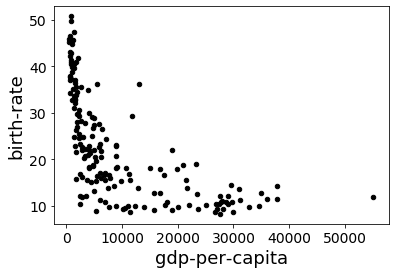

In [45]:
#q37
sql = """SELECT `gdp-per-capita`, `birth-rate`
FROM countries
"""
phonesgdpdf = pd.read_sql(sql, conn)
ax = phonesgdpdf.plot.scatter(x = 'gdp-per-capita', y = 'birth-rate', c = 'black', fontsize = 14)
ax.set_ylabel('birth-rate', fontsize = 18)
ax.set_xlabel('gdp-per-capita', fontsize = 18)

Text(0.5, 0, 'gdp-per-capita')

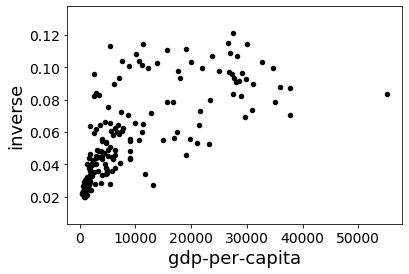

In [46]:
#q38
sql = """SELECT `gdp-per-capita`, 1/`birth-rate` AS 'inverse'
FROM countries
"""
phonesgdpdf = pd.read_sql(sql, conn)
ax = phonesgdpdf.plot.scatter(x = 'gdp-per-capita', y = 'inverse', c = 'black', fontsize = 14)
ax.set_ylabel('inverse', fontsize = 18)
ax.set_xlabel('gdp-per-capita', fontsize = 18)

In [47]:
import numpy as np
phonesgdpdf["1"] = 1
res = np.linalg.lstsq(phonesgdpdf[["gdp-per-capita", '1']], phonesgdpdf["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept

In [48]:
#q39
(m,n)

(1.836570392623344e-06, 0.03916624252079352)

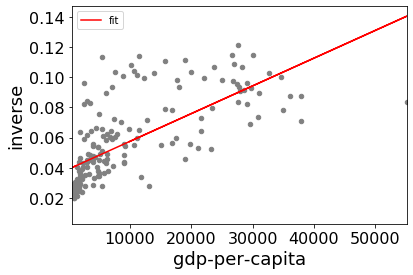

In [49]:
#q40
ax = phonesgdpdf.plot.scatter(x="gdp-per-capita", y='inverse', fontsize = 16, c = 'grey', legend = False)
ax.set_ylabel('inverse', fontsize = 18)
ax.set_xlabel('gdp-per-capita', fontsize = 18)
phonesgdpdf["fit"] = phonesgdpdf["gdp-per-capita"] * m + n
phonesgdpdf.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)